## Waiter Tips Prediction

In [77]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [78]:
data = pd.read_csv("tips.csv")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


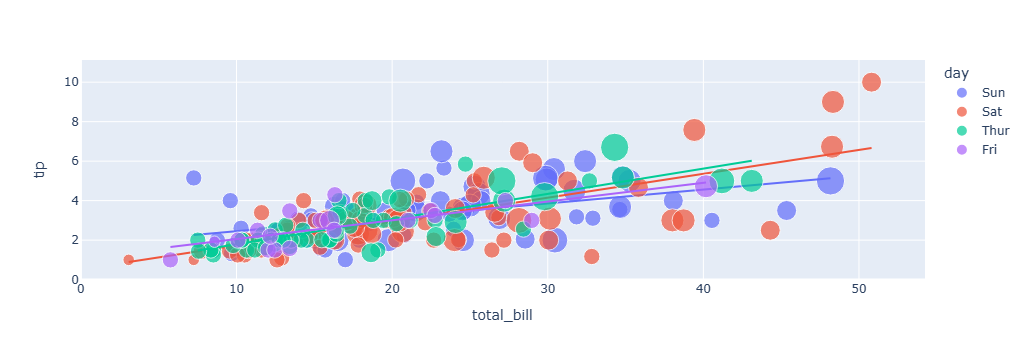

In [80]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "day", trendline="ols")
figure.show()

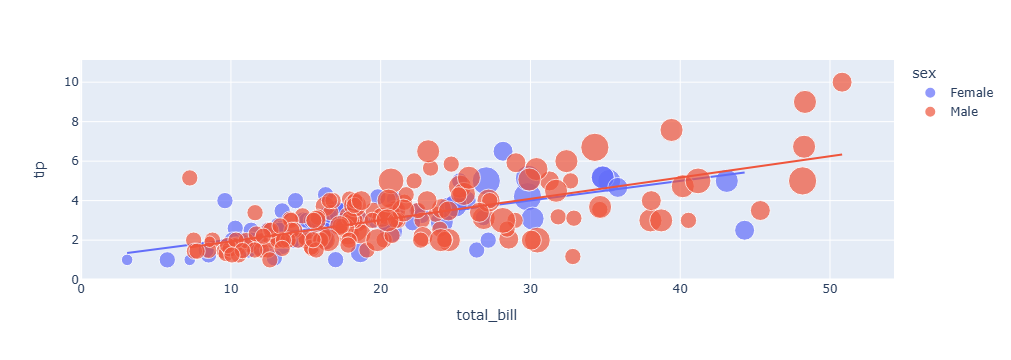

In [81]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "sex", trendline="ols")
figure.show()

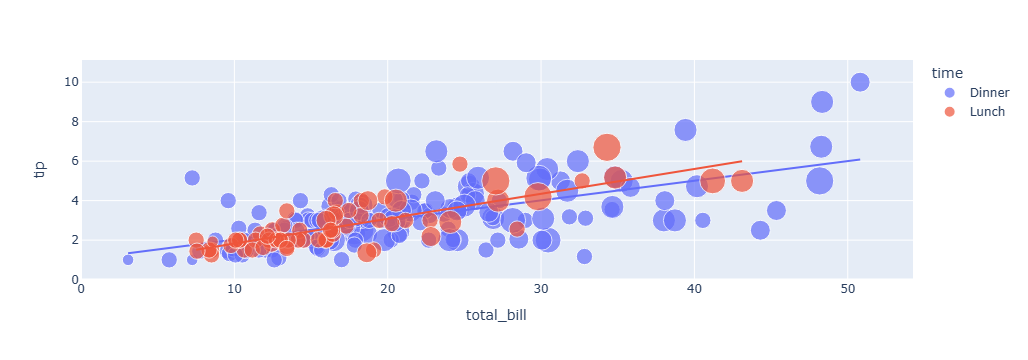

In [52]:
figure = px.scatter( data_frame = data, x ="total_bill",
                    y = "tip", size = "size", color = "time",trendline = "ols")
figure.show()

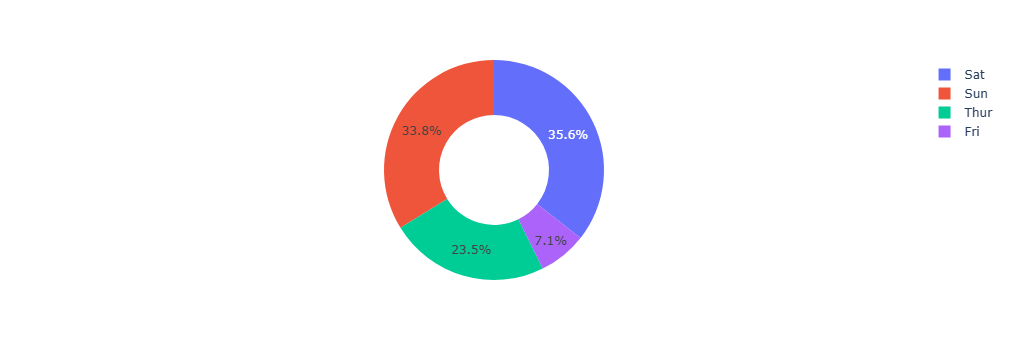

In [82]:
figure = px.pie(data, 
             values='tip', 
             names='day',hole = 0.5)
figure.show()

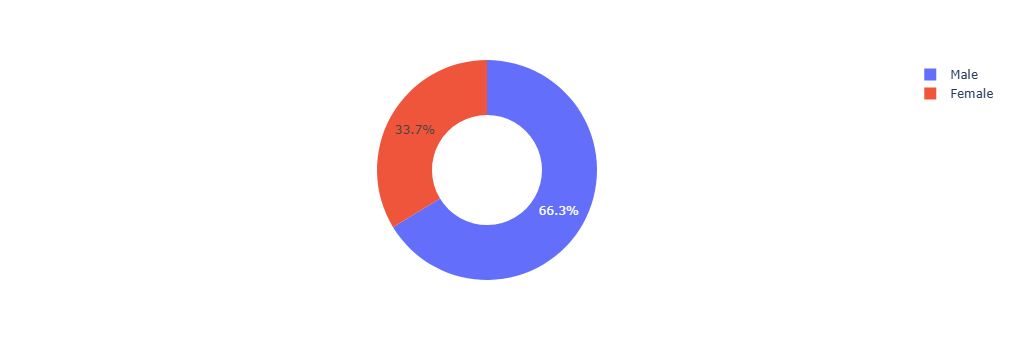

In [83]:
figure = px.pie(data, 
             values='tip', 
             names='sex',hole = 0.5)
figure.show()

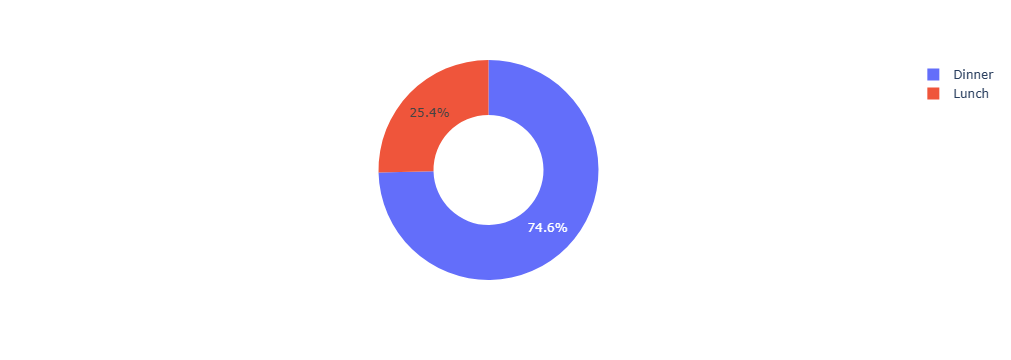

In [85]:
figure = px.pie(data, 
             values='tip', 
             names='time',hole = 0.5)
figure.show()

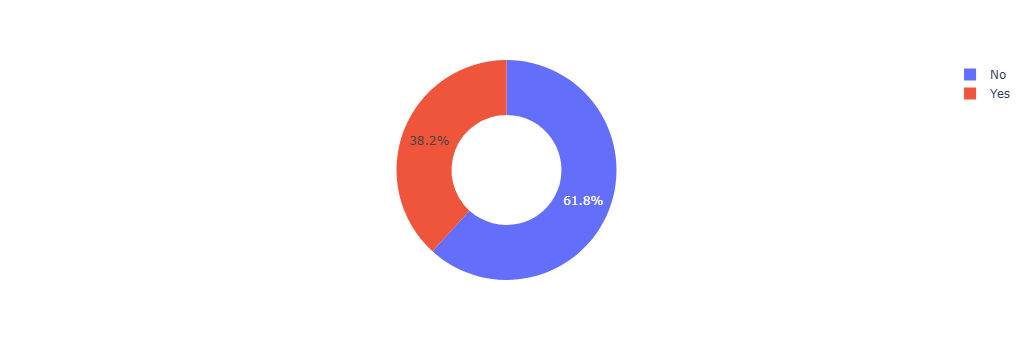

In [86]:
figure = px.pie(data, 
             values='tip', 
             names='smoker',hole = 0.5)
figure.show()

## Waiter Tips Prediction Model

In [87]:
data["sex"] = data["sex"].map({"Female": 0, "Male": 1})
data["smoker"] = data["smoker"].map({"No": 0, "Yes": 1})
data["day"] = data["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
data["time"] = data["time"].map({"Lunch": 0, "Dinner": 1})
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [92]:
x = np.array(data[["total_bill", "sex", "smoker", "day", 
                   "time", "size"]])
y = np.array(data["tip"])

In [93]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [94]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

## Example to predict

In [95]:
# features = [[total_bill, "sex", "smoker", "day", "time", "size"]]
features = np.array([[24.50, 1, 0, 0, 1, 4]])
model.predict(features)

array([3.73742609])